# Monkey portfolios

In [1]:
import pandas as pd
import numpy as np

import matplotlib.font_manager

from cvx.simulator.builder import builder

pd.options.plotting.backend = "plotly"



In [2]:
prices=pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True)

In [3]:
b = builder(prices=prices, initial_cash=1e6)

np.random.seed(42)
for time, state in b:
    n = len(b.assets)
    w = np.random.rand(n)
    # normalize the weights
    w = w/np.sum(w)
    
    assert np.all(w >= 0)
    assert np.allclose(np.sum(w), 1)

    # convert weights into shares
    shares = w / state.prices

    # multiply the shares with the current nav
    b[time[-1]] = state.nav * pd.Series(index=b.assets, data=shares)

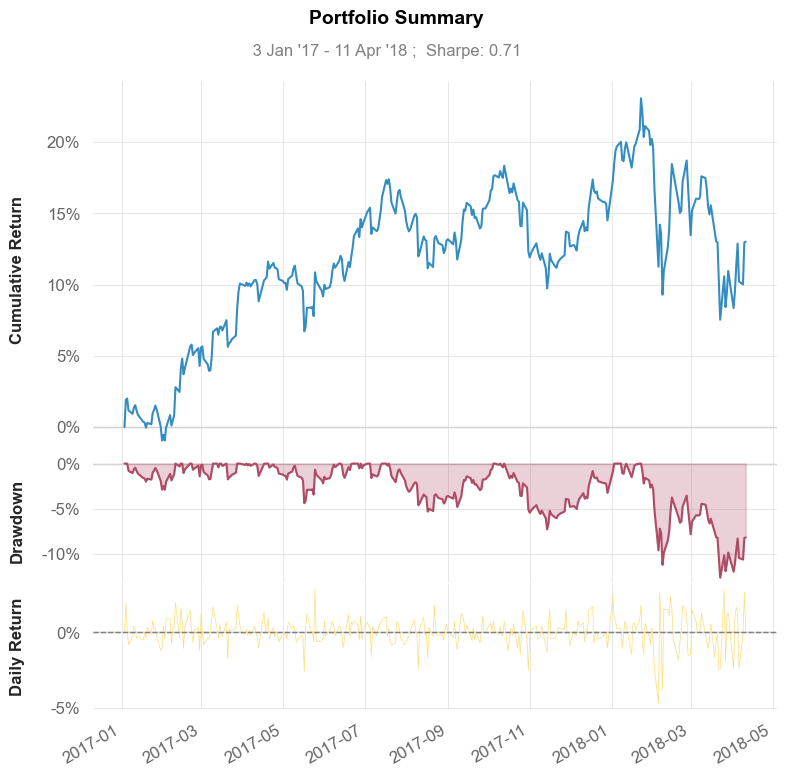

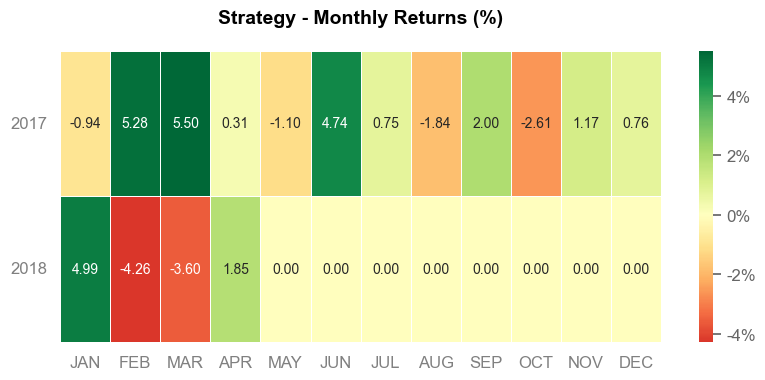

In [4]:
portfolio = b.build()
a=portfolio.profit.cumsum()
portfolio.plots()


In [5]:
b = builder(prices=prices, initial_cash=1e6)

np.random.seed(42)
for time, state in b:
    n = len(b.assets)
    w = np.random.rand(n)
    # normalize the weights
    w = w/np.sum(w)
    
    assert np.all(w >= 0)
    assert np.allclose(np.sum(w), 1)

    # convert weights into shares
    shares = w / state.prices

    # multiply the shares with a constant portfolio size
    b[time[-1]] = 1e6 * pd.Series(index=b.assets, data=shares)

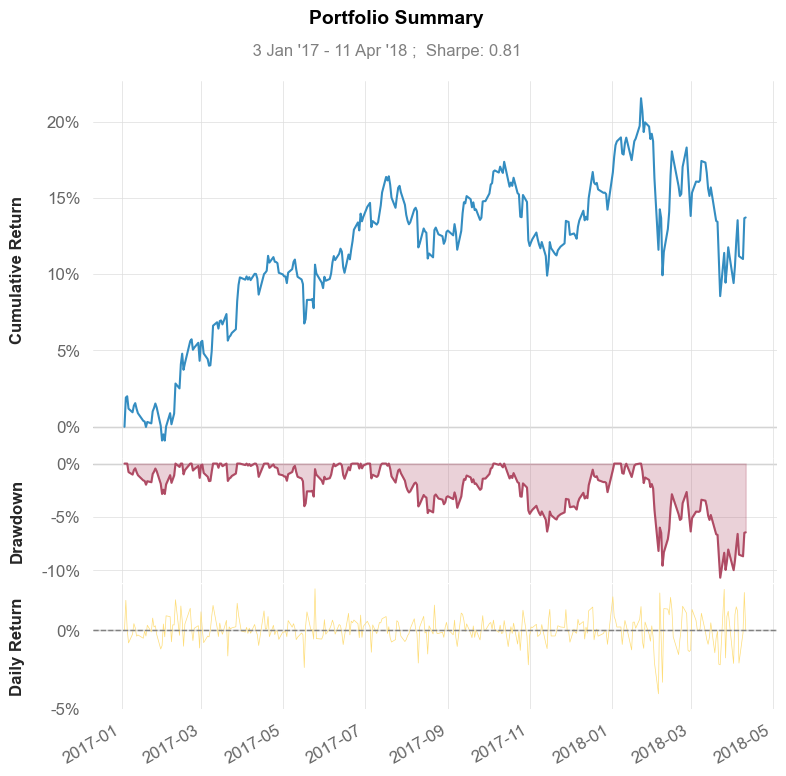

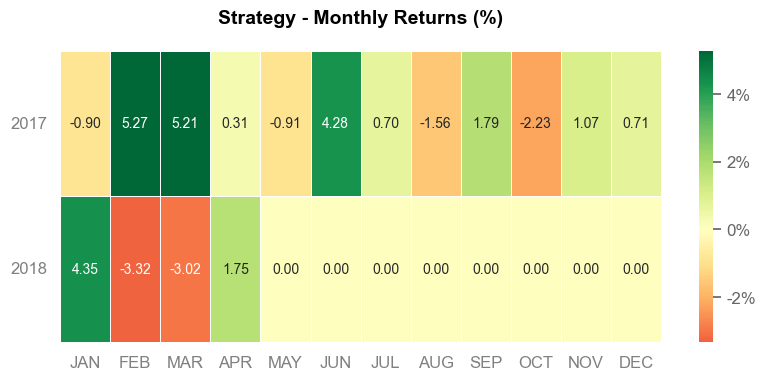

In [6]:
portfolio = b.build()
b=portfolio.profit.cumsum()
portfolio.plots()

In [ ]:
(a-b).plot()